In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:


COMMON_COLS = [
    "lib",
    "hd",
    "ev_score",
    "esm_score",
    "esmif_score_apo-score",
    "coves_score_apo_clean-output-100_processed",
    "Triad_score_score-frompdb-cleanup",
    "ligandmpnn_score",
    "flowsite_score",
    "dH",  # "complexscore",
    "vina_apo-score-substrate_cofactor-docked",
    "var_vol",
]
COMMON_HEME_COLS = COMMON_COLS + [
    "chain_iptm_BA_avg_score_seperate_chai",
    "chain_pae_min_CA_avg_score_seperate_af3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate",
    "num_hydrogen_bond_avg_af3-score_seperate",
    # "num_interactions_avg_af3-score_seperate"
]


COMMON_COL_DICT = {
    "lib": "Library",
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM2",
    "esmif_score_apo-score": "ESM-IF",
    "coves_score_apo_clean-output-100_processed": "CoVES",
    "Triad_score_score-frompdb-cleanup": r"ΔΔ$G_f$",
    "ligandmpnn_score": "LigandMPNN",
    "flowsite_score": "FlowSite",
    "dH": "GALigandDock",
    # "complexscore": "GALigandock",
    "vina_apo-score-substrate_cofactor-docked": "Vina",
    "var_vol": "Active-site volume",
}
COMMON_HEME_COL_dict = {
    **COMMON_COL_DICT,
    "chain_iptm_BA_avg_score_seperate_chai": "Chai-1",
    "chain_pae_min_CA_avg_score_seperate_af3": "AF3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_seperate": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_seperate": "PLIP",
}

TRPB_COLS = COMMON_COLS + [
    "chain_iptm_AB_avg_score_joint_chai",
    "chain_pae_min_BA_avg_score_joint_af3",
    "2:GLU-NH_2_avg_af3-struct_joint",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint",
    "num_hydrogen_bond_avg_af3-score_joint",
    # "num_interactions_avg_af3-score_joint"
]

TRPB_COL_DICT = {
    **COMMON_COL_DICT,
    "chain_iptm_AB_avg_score_joint_chai": "Chai-1",
    "chain_pae_min_BA_avg_score_joint_af3": "AF3",
    "2:GLU-NH_2_avg_af3-struct_joint": "Bond distance",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_joint": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_joint": "PLIP",
}

PARLQ_COLS = COMMON_HEME_COLS + ["0:C-C_1_avg_af3-struct_seperate"]

PARLQ_COL_DICT = {
    **COMMON_HEME_COL_dict,
    "0:C-C_1_avg_af3-struct_seperate": "Bond distance",
}

CB_COLS = COMMON_HEME_COLS + ["0:C-B_avg_af3-struct_seperate"]

CB_COL_DICT = {**COMMON_HEME_COL_dict, "0:C-B_avg_af3-struct_seperate": "Bond distance"}

CSI_COLS = COMMON_HEME_COLS + ["0:C-Si_avg_af3-struct_seperate"]
CSI_COL_DICT = {
    **COMMON_HEME_COL_dict,
    "0:C-Si_avg_af3-struct_seperate": "Bond distance",
}

FINAL_COL_ORDER = [
    "Library",
    "Hamming distance",
    "EVmutation",
    "ESM2",
    "ESM-IF",
    "CoVES",
    r"ΔΔ$G_f$",  # "ΔΔG",
    "Vina",
    "GALigandDock",
    "AF3",
    "Chai-1",
    "LigandMPNN",
    "FlowSite",
    "Bond distance",
    "Hydrogen bonds",
    "Hydrophobicity",
    "Active-site volume",
]

LIB_ORDER = [
    "PfTrpB-7iodo",
    "PfTrpB-7methyl",
    "PfTrpB-7bromo",
    "PfTrpB-5iodo",
    "PfTrpB-5bromo",
    "PfTrpB-5chloro",
    "PfTrpB-4bromo",
    "PfTrpB-6chloro",
    "PfTrpB-5cyano",
    "PfTrpB-4cyano",
    "PfTrpB-56chloro",
    "Rma-CB",
    "Rma-CSi",
    "ParLQ-a",
    "ParLQ-b",
    "ParLQ-c",
    "ParLQ-d",
    "ParLQ-e",
    "ParLQ-f",
    "ParLQ-g",
    "ParLQ-h",
    "ParLQ-i",
]


# Define metric categories
METRICS = ["rho", "ndcg", "ndcg10", "ndcg20", "ndcg25", "top10", "top20", "top25"]
METRICS_DICT = {
    "rho": "Spearman's ρ",
    "ndcg": "NDCG",
    "ndcg10": "NDCG@10%",
    "ndcg20": "NDCG@20%",
    "ndcg25": "NDCG@25%",
    "top10": "Top 10% recall",
    "top20": "Top 20% recall",
    "top25": "Top 25% recall",
}
FITSELE_DICT = {
    "fit": "activity",
    "sele": "selectivity",
}
FIT_METRICS = {metric: [] for metric in METRICS}
SELE_METRICS = {metric: [] for metric in METRICS}
ALL_METRICS_OPTS = [f"{t}_{metric}" for t in ["fit", "sele"] for metric in METRICS]


In [4]:
from REVIVAL.util import checkNgen_folder
from glob import glob

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [5]:
# EVmutation            0.276822
# AF3                   0.275109
# ESM-IF                0.253376
# ΔΔ$G_f$               0.237936
# FlowSite              0.217617
# LigandMPNN            0.210486
# Hydrophobicity        0.202792
# ESM2                  0.190430
# Hydrogen bonds        0.163278
# CoVES                 0.147256
# Chai-1                0.142002
# GALigandDock          0.139342
# Hamming distance      0.105612
# Active-site volume    0.082805
# Bond distance         0.060684
# Vina                  0.036076

In [11]:
mean_order = {'EVmutation': 0.2768217811770033,
 'AF3': 0.27510937817719155,
 'ESM-IF': 0.25337639060174316,
 'ΔΔ$G_f$': 0.2379359431572363,
 'FlowSite': 0.21761692578910427,
 'LigandMPNN': 0.21048597028211027,
 'Hydrophobicity': 0.20279195117240587,
 'ESM2': 0.19043004987201814,
 'Hydrogen bonds': 0.16327797464481064,
 'CoVES': 0.1472555339875756,
 'Chai-1': 0.14200187107097997,
 'GALigandDock': 0.13934204077544654,
 'Hamming distance': 0.1056120088180185,
 'Active-site volume': 0.08280477916699046,
 'Bond distance': 0.06068436002481947,
 'Vina': 0.03607632647375907}

non_native_order = {'ΔΔ$G_f$': 0.5253289357437795,
 'ESM2': 0.5124583994951976,
 'ESM-IF': 0.4810307696386174,
 'LigandMPNN': 0.47801272827331504,
 'EVmutation': 0.46518079125650635,
 'Hydrophobicity': 0.4128233605118986,
 'CoVES': 0.40745455124729146,
 'FlowSite': 0.4007230776739647,
 'Hamming distance': 0.33779809958022083,
 'Hydrogen bonds': 0.2801681087347339,
 'AF3': 0.24164239866966852,
 'Chai-1': 0.20935941751292428,
 'Bond distance': 0.18531261006748512,
 'GALigandDock': 0.12278454354024532,
 'Active-site volume': 0.04690766076960489,
 'Vina': 0.02565526483564774}

new2nature_order = {'AF3': 0.3085763576847145,
 'GALigandDock': 0.1558995380106477,
 'Active-site volume': 0.11870189756437602,
 'EVmutation': 0.08846277109750018,
 'Chai-1': 0.07464432462903574,
 'Vina': 0.04649738811187042,
 'Hydrogen bonds': 0.04638784055488743,
 'FlowSite': 0.03451077390424388,
 'ESM-IF': 0.025722011564868717,
 'Hydrophobicity': -0.007239458167086755,
 'ΔΔ$G_f$': -0.04945704942930689,
 'LigandMPNN': -0.05704078770909446,
 'Bond distance': -0.06394389001784614,
 'CoVES': -0.11294348327214027,
 'Hamming distance': -0.1265740819441838,
 'ESM2': -0.1315982997511613}

informed_all_cols = ["EVmutation", "ESM-IF", "Vina", "AF3", "Chai-1", "Hydrophobicity", "Hydrogen bonds"]
informed_non_native_cols = ["ESM-IF", "Vina", "AF3", "Chai-1"]
informed_new2nature_cols = ["EVmutation", "AF3", "Chai-1", "Hydrogen bonds"]

In [7]:
from scipy.stats import spearmanr
from REVIVAL.util import get_file_name

In [25]:
# navie ensemble 
ensemble_score = []

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/comb/minimal/*.csv")):
    lib_name = get_file_name(f)
    if lib_name == "ParLQ":
        lib_name = "ParLQ-a"
    df = pd.read_csv(f, index_col=0)
    # put nan to 0
    df = df.fillna(0)

    # convert each column that is not fitness to ranking
    for c in df.columns:
        if c != "fitness":
            df[c] = df[c].rank()

    # navie ensemble for all
    y_true = df["fitness"].values

    # sum up all columns
    y_pred = df.drop(columns=["fitness"]).sum(axis=1)

    # calculate spearman correlation
    navie_all = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of mean_order[:12]
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:12]]].sum(axis=1)
    navie_top12 = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of mean_order[:6]
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:6]]].sum(axis=1)
    navie_top6 = spearmanr(y_true, y_pred)[0]

    # sum up top 3
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:3]]].sum(axis=1)
    navie_top3 = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of non_native_order[:6]
    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:6]]].sum(axis=1)
    non_native_top6 = spearmanr(y_true, y_pred)[0]
    # sum up columns if they are in the key of non_native_order[:8]
    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:8]]].sum(axis=1)
    non_native_top8 = spearmanr(y_true, y_pred)[0]

    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:3]]].sum(axis=1)
    non_native_top3 = spearmanr(y_true, y_pred)[0]
    
    
    # sum up columns if they are in the key of new2nature_order[:2]
    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:2]]].sum(axis=1)
    new2nature_top2 = spearmanr(y_true, y_pred)[0]
    # sum up columns if they are in the key of new2nature_order[:3]
    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:3]]].sum(axis=1)
    new2nature_top3 = spearmanr(y_true, y_pred)[0]

    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:6]]].sum(axis=1)
    new2nature_top6 = spearmanr(y_true, y_pred)[0]

    # informed ensemble
    y_pred = df[informed_all_cols].sum(axis=1)
    informed_all = spearmanr(y_true, y_pred)[0]
    y_pred = df[informed_non_native_cols].sum(axis=1)
    informed_non_native = spearmanr(y_true, y_pred)[0]
    y_pred = df[informed_new2nature_cols].sum(axis=1)
    informed_new2nature = spearmanr(y_true, y_pred)[0]


    # save to dict
    ensemble_score.append(
        {
            "Library": lib_name,
            "All": navie_all,
            "Top3": navie_top3,
            "Top6": navie_top6,
            "Non-native top3": non_native_top3,
            "Non-native top6": non_native_top6,
            # "Non-native_top8": non_native_top8,
            # "new2nature_top2": new2nature_top2,
            "New-to-nature top3": new2nature_top3,
            "New-to-nature top6": new2nature_top6,
            # "Informed all": informed_all,
            # "Informed non-native": informed_non_native,
            # "Informed new-to-nature": informed_new2nature,
        }
    )

In [26]:
ensemble_df = pd.DataFrame(ensemble_score)
ensemble_df

,Library,All,Top3,Top6,Non-native top3,Non-native top6,New-to-nature top3,New-to-nature top6
0,ParLQ-b,-0.063068,0.039961,-0.156358,-0.259072,-0.241769,0.246169,0.299609
1,ParLQ-c,0.106005,0.182499,-0.042341,-0.182905,-0.157172,0.272768,0.366337
2,ParLQ-d,0.257020,0.191657,0.113440,-0.179560,-0.089276,0.401867,0.404229
3,ParLQ-e,0.259317,0.226200,0.211904,-0.014223,0.025009,0.220261,0.197097
4,ParLQ-f,0.188179,0.266012,0.113152,-0.049628,-0.006164,0.204675,0.281311
5,ParLQ-g,0.257130,0.236302,0.213178,-0.007183,0.052837,0.291055,0.293441
6,ParLQ-h,0.117601,0.139833,-0.071629,-0.165640,-0.165803,0.302355,0.399043
7,ParLQ-i,0.054269,0.052806,-0.094955,-0.245394,-0.235073,0.260083,0.273155
8,ParLQ-a,0.312371,0.325853,0.280015,0.219439,0.103721,0.449105,0.308090
9,PfTrpB-4bromo,0.556906,0.533105,0.571519,0.559491,0.521066,0.275618,0.425229


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

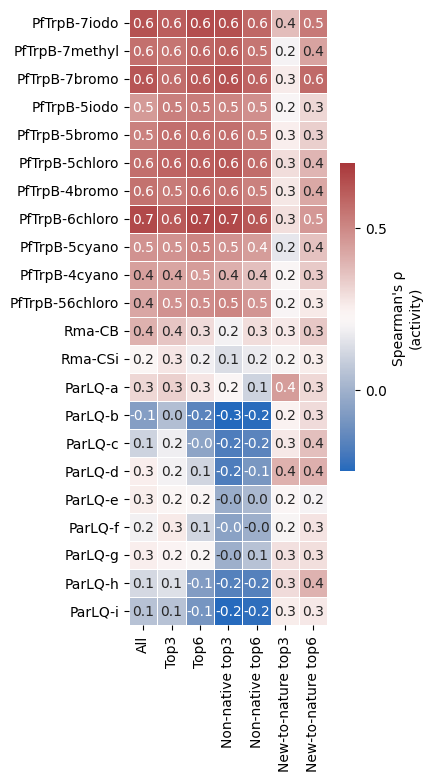

In [36]:

# Set the figure size
plt.figure(figsize=(3.2, 8))
# Create a heatmap
sns.heatmap(
    ensemble_df
    .set_index("Library")
    .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5], "shrink": 0.5},
    vmin=-0.25,
    vmax=0.7
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
plt.savefig("figs/zs_naivecomb_fit_rho_all.svg", format="svg", dpi=300, bbox_inches="tight")

In [38]:
ensemble_df = ensemble_df.set_index("Library")
ensemble_df

,All,Top3,Top6,Non-native top3,Non-native top6,New-to-nature top3,New-to-nature top6
Library,,,,,,,
ParLQ-b,-0.063068,0.039961,-0.156358,-0.259072,-0.241769,0.246169,0.299609
ParLQ-c,0.106005,0.182499,-0.042341,-0.182905,-0.157172,0.272768,0.366337
ParLQ-d,0.257020,0.191657,0.113440,-0.179560,-0.089276,0.401867,0.404229
ParLQ-e,0.259317,0.226200,0.211904,-0.014223,0.025009,0.220261,0.197097
ParLQ-f,0.188179,0.266012,0.113152,-0.049628,-0.006164,0.204675,0.281311
ParLQ-g,0.257130,0.236302,0.213178,-0.007183,0.052837,0.291055,0.293441
ParLQ-h,0.117601,0.139833,-0.071629,-0.165640,-0.165803,0.302355,0.399043
ParLQ-i,0.054269,0.052806,-0.094955,-0.245394,-0.235073,0.260083,0.273155
ParLQ-a,0.312371,0.325853,0.280015,0.219439,0.103721,0.449105,0.308090


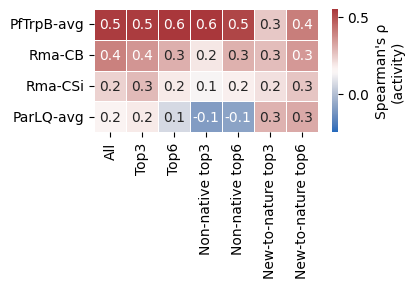

In [40]:
groups = {
    "PfTrpB-avg": [c for c in LIB_ORDER if c.startswith("PfTrpB")],
    "ParLQ-avg": [c for c in LIB_ORDER if c.startswith("ParLQ")],
}

for new_row, rows in groups.items():
    ensemble_df.loc[new_row] = ensemble_df.loc[rows].mean()

# Set the figure size
plt.figure(figsize=(3.6, 1.6))
# Create a heatmap
sns.heatmap(
    ensemble_df.loc[["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]],
    # .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5]},
    vmin=-0.25,
    vmax=0.55
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
plt.savefig("figs/zs_naivecomb_fit_rho.svg", format="svg", dpi=300, bbox_inches="tight")